# Medications

### Description 

The Human Phenotype Project study medications data is based on self reported, participant provided information.
Some of the Self-reported medications are coded to Anatomical Therapeutic Chemical (ATC) codes from the WHO Collaborating Centre for Drug Statistics Methodology. The ATC classification system has become the gold standard for international drug utilization monitoring and research. 

### Introduction

Medication usage reporting in medical research and in longitudinal cohort studies is a key aspect of understanding the effectiveness, safety and biological interactions of different drugs. Medication usage data can help researchers to better understand how different medications affect individually different populations or different organ systems based on the specific genetics, environment, lifestyle and medical history of the individual. For example, the specific individual’s microbiome population can be strongly influenced by the drugs consumed on one hand and can have a strong effect on the drugs metabolism and absorption on the other hand. Interaction between drugs is another aspect that can affect the treatment efficacy.

There are different methods for collecting medication usage data in research studies, such as self-report, use of medical records, pill count, and electronic monitoring. Self-report is when the participant reports the use of medication to the researcher. Having accurate and complete data on medication usage is essential to understanding the true impact of these medications on individuals' health. 

The medication information collection in the Human Phenotype Project study is based on self reporting of medications usage via online and smartphone applications and collection by staff members by telephone or face-to-face interviews during follow-up. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Currently, there are several origins for the medication data:
1. During registration (sign up) to the study, participants are asked to report their regular medications online (autofill), selecting from a predefined drop-down list (Updated Clalit db). The medication responses are stored in the 10k medical database. A medication corresponding to exclusion criteria triggers cessation of the questionnaire and exclusion message. For a while, about a year, the data was not saved. Status: at this point only this data available for users
2. Initial Questionnaire also contains some medication related questions (see detailed list in “data source section”).
3. Participants can log the medications taken and the consumption time using a dedicated mobile app ”Project 10k”. They requested to log during the two weeks period following each visit.
4. On follow up stages calls or visits to the clinical testing center - ​​participants are asked to report about any new medications they take or stopped taking and provide the month and year of when each medication was given or stopped. A staff member fills the  medications from a predefined dropdown list.
In case the staff member cannot find the exact medication in the list, they asked to log the missing medication using the app. There is also an option to free text. 

### Data availability 
<!-- for the example notebooks -->
- During registration (sign-up) for the study, participants are asked to report their regular medications online, with an autofill feature, selecting from a predefined drop-down list.
- During follow-up calls or visits, participants update their medication intake.
- App medication logging.

All three sources of data are stored in 1 parquet file: `medications.parquet`

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/018-medications.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/18)


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


from pheno_utils import PhenoLoader
from pheno_utils.basic_plots import plot_horizontal_count_bars

In [3]:
pl = PhenoLoader('medications', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for medications with
15 fields
2 tables: ['medications', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,folder_id,feature_set,field_string,relative_location,description_string,bulk_dictionary,data_coding,stability,field_type,units,sampling_rate,strata,sexed,array,list_of_tags,debut,transformation,pandas_dtype,completed,bulk_file_extension
tabular_field_name,,,,,,,,,,,,,,,,,,,,
collection_timestamp,18,medications,Collection time,medications/medications.parquet,Collection time,NaN,NaN,NaN,Datetime,NaN,NaN,Collection time,Both sexes,Single,NaN,NaN,NaN,"datetime64[ns, Asia/Jerusalem]",NaN,NaN
collection_date,18,medications,Collection date,medications/medications.parquet,Collection date,NaN,NaN,NaN,Date,NaN,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,datetime64[ns],NaN,NaN
timezone,18,medications,Timezone,medications/medications.parquet,Timezone,NaN,NaN,NaN,Categorical (single),NaN,NaN,Collection time,Both sexes,Single,NaN,NaN,NaN,category,NaN,NaN
medication,18,medications,Medication name,medications/medications.parquet,Medication name,NaN,NaN,NaN,Categorical (single),NaN,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,category,NaN,NaN
api,18,medications,Active Pharmaceutical Ingredient,medications/medications.parquet,Active Pharmaceutical Ingredient,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc3,18,medications,List of atc codes level 3,medications/medications.parquet,List of atc codes level 3,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc4,18,medications,List of atc codes level 4,medications/medications.parquet,List of atc codes level 4,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc5,18,medications,List of atc codes level 5,medications/medications.parquet,List of atc codes level 5,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
start_month,18,medications,Start month,medications/medications.parquet,Start month of medication taking,NaN,042_03,NaN,Categorical (single),NaN,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Int64,NaN,NaN


In [5]:
## Fields that contain multiple values
pl.dict[pl.dict.field_type == 'Categorical (multiple)']

,folder_id,feature_set,field_string,relative_location,description_string,bulk_dictionary,data_coding,stability,field_type,units,sampling_rate,strata,sexed,array,list_of_tags,debut,transformation,pandas_dtype,completed,bulk_file_extension
tabular_field_name,,,,,,,,,,,,,,,,,,,,
api,18,medications,Active Pharmaceutical Ingredient,medications/medications.parquet,Active Pharmaceutical Ingredient,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc3,18,medications,List of atc codes level 3,medications/medications.parquet,List of atc codes level 3,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc4,18,medications,List of atc codes level 4,medications/medications.parquet,List of atc codes level 4,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN
atc5,18,medications,List of atc codes level 5,medications/medications.parquet,List of atc codes level 5,NaN,NaN,NaN,Categorical (multiple),NaN,NaN,Primary,Both sexes,Multiple,NaN,NaN,NaN,object,NaN,NaN


In [6]:
pl[pl.fields].head()

,,,,api,atc3,atc4,atc5,collection_date,collection_timestamp,medication,source,start_date,start_month,start_year,supplements,timezone,age,sex
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,
5516424321,10k,00_00_visit,0,[FLUOXETINE],[N05],[N05CH],[N06AX11],2022-11-19 22:00:54.747024896,2023-01-01 22:55:48.349642496,Prolia,app,NaT,NaN,0,False,asia/jerusalem,54.447672,Female
5027574288,10k,00_00_visit,0,[MELATONIN],[A05],[A10BJ],"[A10BA02, A10BD07, A10BH01]",2020-06-03 11:32:37.429017856,2023-08-27 15:23:15.824340736,HR,system,NaT,NaN,0,False,asia/jerusalem,54.169913,Male
7783260382,10k,00_00_visit,0,[],[],[],[],2023-11-02 03:22:11.262582016,2023-11-17 03:50:41.892133376,Basaglar,follow_up,NaT,NaN,0,True,asia/jerusalem,45.892093,Male
1178277844,10k,00_00_visit,0,[DUTASTERIDE],[A10],[A11CC],[A11CC05],2023-09-04 04:52:31.311277824,2023-10-11 23:11:04.204100864,Vitamin E,follow_up,NaT,NaN,0,True,asia/jerusalem,44.435100,Female
1622660825,10k,00_00_visit,0,[PREDNISONE],[A10],[C01BC],[A11GA01],2023-09-30 15:48:42.802777600,2023-10-03 02:23:50.764764672,Normiten,follow_up,NaT,NaN,0,True,asia/jerusalem,44.621536,Male


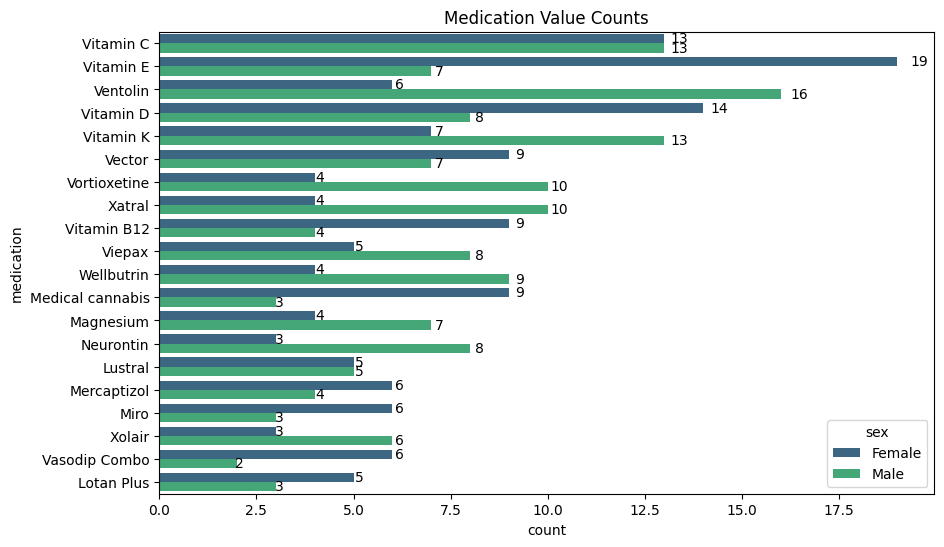

In [7]:
plot_horizontal_count_bars(pl[pl.fields].query('medication !="no medications taken"'), 'medication', n = 20, hue='sex')

### Filter a Categorical (multiple) type column

In [8]:
def filter_on_value(df, column, value):
    return df[(df[column].apply(lambda x: value in x))]

In [9]:
df_res = filter_on_value(pl[pl.fields], 'atc5', 'C09AA02')
df_res.head()

,,,,api,atc3,atc4,atc5,collection_date,collection_timestamp,medication,source,start_date,start_month,start_year,supplements,timezone,age,sex
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,
8552910939,10k,00_00_visit,0,[CIMICIFUGAE RHIZOMA],[A11],[C08CA],"[C08CA13, C09AA02, C09BB02]",2022-06-01 05:37:54.377797376,2022-05-26 08:27:31.073150720,Magnesium,follow_up,NaT,NaN,2021,False,asia/jerusalem,55.319435,Male


### Plot a  Categorical (multiple) type col

In [10]:
col = 'atc4'
# Expand the col lists into separate rows
df_exploded = pl[pl.fields].explode(col)
df_exploded[[col]].head()


,,,,atc4
participant_id,cohort,research_stage,array_index,
5516424321,10k,00_00_visit,0,N05CH
5027574288,10k,00_00_visit,0,A10BJ
7783260382,10k,00_00_visit,0,NaN
1178277844,10k,00_00_visit,0,A11CC
1622660825,10k,00_00_visit,0,C01BC


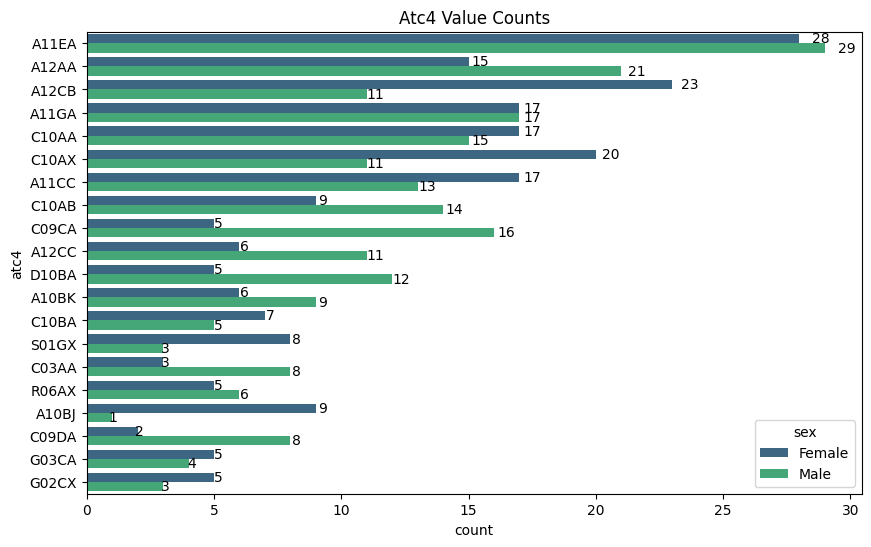

In [11]:
plot_horizontal_count_bars(df_exploded, 'atc4', n = 20, hue='sex')

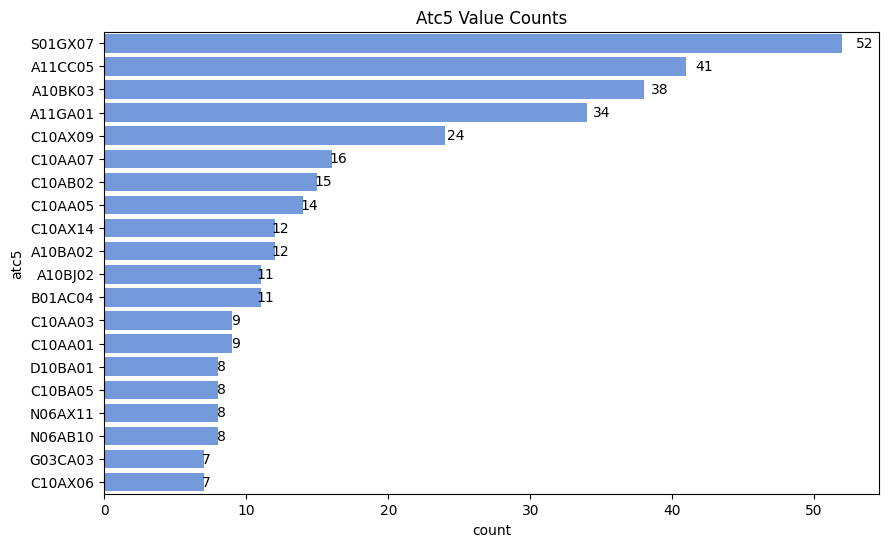

In [12]:
col = 'atc5'
# Expand the col lists into separate rows
df_exploded = pl[pl.fields].explode(col)
plot_horizontal_count_bars(df_exploded, col, n = 20)

## Data Pivots

In [13]:
def pivot_atc_api(df, pivot_column, index_columns=['participant_id', 'cohort', 'research_stage']):
    # Explode the specified column to separate rows
    exploded_df = df.explode(pivot_column)
    
    # Create a True value for each row to indicate the presence of the ATC/API code
    exploded_df['value'] = True
    
    # Pivot the DataFrame to get True/False for the presence of each ATC/API code
    pivot_df = exploded_df.pivot_table(index=index_columns, columns=pivot_column, values='value', fill_value=False)
    pivot_df = pivot_df.astype(bool)
    
    return pivot_df

In [14]:
# Example usage
pivot_column = 'atc4'  # Change this to 'atc3', 'atc4', 'atc5', or 'api' as needed
pivot_df = pivot_atc_api(pl[pl.fields], pivot_column)
pivot_df.head()


atc4                                  A02BC  A05AA  A10AB  A10AE  A10BA  \
participant_id cohort research_stage                                      
1067433273     10k    00_00_visit     False  False  False  False  False   
                      02_00_visit     False  False  False  False  False   
1077141271     10k    00_00_visit     False  False  False  False  False   
1178277844     10k    00_00_visit     False  False  False  False  False   
1197725589     10k    00_00_visit     False  False  False  False  False   

atc4                                  A10BD  A10BH  A10BJ  A10BK  A11CC  ...  \
participant_id cohort research_stage                                     ...   
1067433273     10k    00_00_visit     False  False  False  False  False  ...   
                      02_00_visit     False  False  False  False  False  ...   
1077141271     10k    00_00_visit     False  False  False  False  False  ...   
1178277844     10k    00_00_visit     False  False  False  False   True  ...   
1197725589     10k    00_00_visit     False  False  False  False  False  ...   

atc4                                  N06BA  QA07F  R03AC  R03AK  R03DC  \
participant_id cohort research_stage                                      
1067433273     10k    00_00_visit     False  False  False  False  False   
                      02_00_visit     False  False  False  False  False   
1077141271     10k    00_00_visit     False  False  False  False  False   
1178277844     10k    00_00_visit     False  False  False  False  False   
1197725589     10k    00_00_visit     False  False  False  False  False   

atc4                                  R03DX  R06AX  S01ED  S01EE  S01GX  
participant_id cohort research_stage                                     
1067433273     10k    00_00_visit     False  False  False  False  False  
                      02_00_visit     False  False  False  False  False  
1077141271     10k    00_00_visit     False  False  False  False  False  
1178277844     10k    00_00_visit     False  False  False  False  False  
1197725589     10k    00_00_visit     False  False  False  False  False  

[5 rows x 70 columns]

In [15]:
pivot_df.S01EE.value_counts(dropna=False)

S01EE
False    511
True       7
Name: count, dtype: int64